# EDA - Clustering Feature - AV products

* 백신 제품에 대해 분석할 예정!

## 라이브러리

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

## 데이터 로드

In [3]:
dtypes = {
        'MachineIdentifier':                                    'object',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
%%time
train = pd.read_csv('./data/train.csv', dtype=dtypes)
test = pd.read_csv('./data/test.csv', dtype=dtypes)

Wall time: 7min 48s


In [5]:
data = train.append(test)

## AV 관련 피처

* ProductName
* EngineVersion
* AppVersion
* AvSigVersion
* AVProductStatesIdentifier
* AVProductsInstalled
* AVProductsEnabled
* Platform
* OsVer
* OsBuild
* OsSuite
* OsPlatformSubRelease
* OsBuildLab
* IsProtected
* Census_OSVersion
* Census_OSArchitecture (삭제)
* Census_OSBranch (삭제)
* Census_OSBuildNumber
* Census_OSBuildRevision

### AVProductStatesIdentifier
* ID for the specific configuration of a user's antivirus software (사용자의 백신의 특정 설정에 대한 고유값)
* 백신 자체에 대한 ID는 아닐 것으로 추정 (고유개수가 39832개, 반면 바이러스 토탈을 통해 확인할 수 있는 백신의 개수는 약 130 내외)
* 그렇다면 백신의 특정 버전까지 ID로 치환하지 않았을까?
* 여기서 생각해볼점이 윈도우 디펜더를 AV 제품으로 포함했을까? (상식적으로 윈도우 디펜더에도 AV 기능이 있기 때문에 포함하는 것이 맞음)
* 나는 포함했다고 생각
    > 근거1) 
    - AVProductStatesIdentifier의 고유값 개수를 보면 53447값이 67%정도 차지.
    - MS가 수집한 기계가 특정 회사의 백신을 압도적으로 많이 사용한 것으로 생각하기 어려움.
    - 또, 53447외에 나머지 백신은 개수가 크게 다르지 않음.
    - 따라서, 53447는 디펄트 백신(윈도우 디펜더)라고 생각할 수 있음.

* 29199 mse일 확률이 높다.
* 이 컬럼은 백신의 조합별 고유한 인덱스를 갖는다. (디펜더 + 카스퍼스키 => 고유인덱스)

In [26]:
print("고유 개수: ", len(data.AVProductStatesIdentifier.unique()))

고유 개수:  39832


In [55]:
col = 'AVProductStatesIdentifier'
temp = data[col].value_counts(dropna=False).to_frame()
temp['rate'] = np.around(100 * data[col].value_counts(dropna=False) / data.shape[0], 2)
temp.sort_values('AVProductStatesIdentifier', ascending=False)

,AVProductStatesIdentifier,rate
53447.0,11333187,67.56
7945.0,771310,4.60
47238.0,629111,3.75
62773.0,522088,3.11
46413.0,191441,1.14
49480.0,181362,1.08
23657.0,160455,0.96
41571.0,151316,0.90
51954.0,131974,0.79
29199.0,117033,0.70


In [57]:
temp = temp.sort_values('AVProductStatesIdentifier', ascending=False)

In [72]:
idx = temp[temp.AVProductStatesIdentifier >= 1000]['AVProductStatesIdentifier'].index
values = temp[temp.AVProductStatesIdentifier >= 1000]['AVProductStatesIdentifier'].values

In [90]:
t = {}
for i in range(len(list(idx))):
    t[idx[i]] = idx[i]

In [93]:
data.AVProductStatesIdentifier = data.AVProductStatesIdentifier.map(t).fillna(-1)

### AVProductsInstalled
* 안티바이러스 제품이 설치됐는가?
* 숫자로 제공 => 설치된 개수가 아닐까?
* Installed가 1이라는 것은 1개의 백신이 설치 돼 있다. 여기서 생각해볼 점은 이게 윈도우 디펜더냐? 즉, 윈도우 디펜더가 있는 상태로 다른 백신을 설치하면 몇개로 잡힐까?
* 3개의 컬럼 모두 NaN의 비율이 같음. 즉 동일한 NaN Value

In [33]:
col = 'AVProductsInstalled'
temp = data[col].value_counts(dropna=False).to_frame()
temp['rate'] = np.around(100 * data[col].value_counts(dropna=False) / data.shape[0], 2)
temp.sort_values('AVProductsInstalled', ascending=False)

,AVProductsInstalled,rate
1.0,12058502,71.88
2.0,4284613,25.54
3.0,355807,2.12
NaN,59988,0.36
4.0,14975,0.09
5.0,800,0.00
6.0,49,0.00
7.0,1,0.00
0.0,1,0.00


In [99]:
data[data.AVProductsInstalled == 1].groupby(['AVProductStatesIdentifier', 'AVProductsInstalled']).size()

AVProductStatesIdentifier  AVProductsInstalled
-1.0                       1.0                        4629
 29199.0                   1.0                      117033
 29557.0                   1.0                        1717
 29810.0                   1.0                        1086
 53447.0                   1.0                    11333187
 53530.0                   1.0                        3734
 59792.0                   1.0                       23503
 62773.0                   1.0                      522088
 63682.0                   1.0                       51525
dtype: int64

In [142]:
data[data.AVProductsInstalled == 1].groupby(['ProductName', 'AVProductStatesIdentifier']).size()

ProductName    AVProductStatesIdentifier
mse            -1.0                              991
                29199.0                       117032
                29557.0                         1717
                29810.0                         1085
                53447.0                            1
win8defender   -1.0                             3528
                29199.0                            1
                29810.0                            1
                53447.0                     11333186
                53530.0                         3734
                59792.0                        23503
                62773.0                       522088
                63682.0                        51525
mseprerelease  -1.0                               70
windowsintune  -1.0                                7
fep            -1.0                                9
scep           -1.0                               24
dtype: int64

In [116]:
data[data.HasDetections.isna()].index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            7853243, 7853244, 7853245, 7853246, 7853247, 7853248, 7853249,
            7853250, 7853251, 7853252],
           dtype='int64', length=7853253)

In [114]:
data.HasDetections.value_counts(dropna=False)

NaN     7853253
 0.0    4462591
 1.0    4458892
Name: HasDetections, dtype: int64

In [ ]:
train[train.AVProductsInstalled == 1].groupby(['AVProductStatesIdentifier', 'AVProductsInstalled']).size()

In [117]:
data['is_train'] = 1

In [118]:
data.loc[data.HasDetections.isna(), 'is_train'] = 0

In [121]:
train = data[data.is_train == 1]
test = data[data.is_train == 0]

In [113]:
values[1]

771310

In [47]:
train[train.AVProductsInstalled.isna()].HasDetections.value_counts() / (22588 + 13633)

0    0.623616
1    0.376384
Name: HasDetections, dtype: float64

### AVProductsEnabled

In [129]:
col = 'AVProductsEnabled'
temp = data[col].value_counts(dropna=False).to_frame()
temp['rate'] = np.around(100 * data[col].value_counts(dropna=False) / data.shape[0], 2)
temp.sort_values('AVProductsEnabled', ascending=False)

,AVProductsEnabled,rate
1.0,16311508,97.24
2.0,347521,2.07
NaN,59988,0.36
0.0,43561,0.26
3.0,11268,0.07
4.0,849,0.01
5.0,41,0.00


In [38]:
data.ProductName.value_counts(dropna=False)

win8defender     16623765
mse                150819
mseprerelease          87
scep                   38
fep                    14
windowsintune          13
Name: ProductName, dtype: int64

In [141]:
data[data.AVProductsEnabled == 0].AVProductStatesIdentifier.value_counts()

 59792.0    23503
-1.0         9401
 8925.0      6305
 29557.0     1717
 54353.0     1509
 57040.0     1126
Name: AVProductStatesIdentifier, dtype: int64

In [135]:
train.groupby(['AVProductsInstalled', 'AVProductsEnabled']).HasDetections.sum()

AVProductsInstalled  AVProductsEnabled
0.0                  0.0                        0.0
1.0                  0.0                     6888.0
                     1.0                  3399190.0
2.0                  0.0                     2056.0
                     1.0                   924406.0
                     2.0                    49534.0
3.0                  0.0                      232.0
                     1.0                    42497.0
                     2.0                    16497.0
                     3.0                     1456.0
4.0                  0.0                        6.0
                     1.0                     1044.0
                     2.0                      769.0
                     3.0                      439.0
                     4.0                      113.0
5.0                  0.0                        2.0
                     1.0                       31.0
                     2.0                       31.0
                     3.0 

In [143]:
train.groupby(['AVProductsEnabled', 'AVProductStatesIdentifier']).size()

AVProductsEnabled  AVProductStatesIdentifier
0.0                -1.0                            5685
                    8925.0                         3927
                    29557.0                        1076
                    54353.0                        1026
                    57040.0                         547
                    59792.0                       13697
1.0                -1.0                          181887
                    983.0                           798
                    3025.0                         1296
                    3371.0                        40700
                    4267.0                         1282
                    4470.0                         2616
                    4786.0                         3666
                    5189.0                         1282
                    5439.0                         3241
                    5545.0                          732
                    5907.0                         1006
   

In [145]:
data.groupby(['AVProductsEnabled', 'IsProtected']).size()

AVProductsEnabled  IsProtected
0.0                0.0               43281
                   1.0                 280
1.0                0.0              857469
                   1.0            15454039
2.0                0.0               14673
                   1.0              332848
3.0                0.0                  96
                   1.0               11172
4.0                0.0                   4
                   1.0                 845
5.0                1.0                  41
dtype: int64

In [148]:
data.groupby(['AVProductsEnabled', 'AVProductStatesIdentifier']).size()

AVProductsEnabled  AVProductStatesIdentifier
0.0                -1.0                             9401
                    8925.0                          6305
                    29557.0                         1717
                    54353.0                         1509
                    57040.0                         1126
                    59792.0                        23503
1.0                -1.0                           308794
                    983.0                           1284
                    3025.0                          2089
                    3371.0                         71381
                    4267.0                          1947
                    4470.0                          4065
                    4786.0                          5523
                    5189.0                          2129
                    5439.0                          4979
                    5545.0                          1136
                    5907.0                 

In [185]:
data.groupby(['AVProductsInstalled', 'IsProtected']).size()

AVProductsInstalled  IsProtected
0.0                  1.0                   1
1.0                  0.0              604977
                     1.0            11453525
2.0                  0.0              293054
                     1.0             3991559
3.0                  0.0               16957
                     1.0              338850
4.0                  0.0                 522
                     1.0               14453
5.0                  0.0                  12
                     1.0                 788
6.0                  0.0                   1
                     1.0                  48
7.0                  1.0                   1
dtype: int64

In [178]:
tt = data[data.AVProductsInstalled == 2].groupby(['AVProductStatesIdentifier'])['CountryIdentifier'].unique()
ttt = data[data.AVProductsInstalled == 2].groupby(['AVProductStatesIdentifier']).size()

In [183]:
pd.DataFrame({"t": tt.apply(lambda v: len(v)), "tt":(tt.apply(lambda v: len(v)) / ttt) * 100, "ttt":ttt})

,t,tt,ttt
AVProductStatesIdentifier,,,
-1.0,222,0.077415,286765
983.0,50,3.894081,1284
2063.0,139,3.452558,4026
2558.0,197,1.223071,16107
3371.0,220,0.308205,71381
4786.0,153,2.770234,5523
7945.0,222,0.028782,771310
8925.0,178,2.823156,6305
9471.0,208,0.798771,26040


In [184]:
col = 'AVProductStatesIdentifier'
table = train.groupby(col)['HasDetections'].sum().to_frame()
table['cnt'] = train.groupby(col)['HasDetections'].count()
table['rate'] = np.around((table.HasDetections / table.cnt) * 100, 2)
table.sort_values('HasDetections', ascending=False)

,HasDetections,cnt,rate
AVProductStatesIdentifier,,,
53447.0,3240582.0,5824565,55.64
7945.0,165771.0,475897,34.83
47238.0,152550.0,327656,46.56
-1.0,105793.0,319725,33.09
62773.0,101939.0,266764,38.21
46413.0,55708.0,112878,49.35
23657.0,41380.0,100455,41.19
49480.0,39753.0,99899,39.79
29199.0,35973.0,73550,48.91


In [187]:
a = data.groupby(['IsProtected', 'AVProductStatesIdentifier']).size()

In [203]:
tt = set(a.loc[0].index)

In [204]:
ttt = set(a.loc[1].index)

In [206]:
tt.intersection(ttt)

{-1.0, 12720.0, 29557.0, 32215.0, 53769.0, 54353.0, 61616.0, 61859.0}

In [220]:
a = a.to_frame()

In [230]:
a.apply(lambda v: v[0],axis=1)#np.sum(train[train.AVProductStatesIdentifier == v[0]].HasDetections) / len(train[train.AVProductStatesIdentifier == v[0]].HasDetections), axis=1)

IsProtected  AVProductStatesIdentifier
0.0          -1.0                            93119
              8925.0                          6305
              9255.0                          2704
              9471.0                         26040
              10119.0                         3809
              10283.0                         1229
              12380.0                         1586
              12720.0                         2392
              22847.0                         5938
              23796.0                        10617
              24286.0                         1606
              29557.0                         1683
              29810.0                         1086
              32215.0                         1374
              53530.0                         3734
              53769.0                         1516
              54353.0                         1508
              57040.0                         1126
              57073.0                      

In [262]:
a = data.groupby(['IsProtected', 'AVProductsInstalled', 'AVProductsEnabled', 'AVProductStatesIdentifier']).size()

In [263]:
a = a.to_frame()

In [295]:
a.columns.tolist()

[0]

In [307]:
for v in list(a.index.get_level_values(3)):
        result.append(np.sum(train[train.AVProductStatesIdentifier == v].HasDetections) / len(train[train.AVProductStatesIdentifier == v].HasDetections))

In [310]:
a['rate'] = result

In [311]:
a

0  \
IsProtected AVProductsInstalled AVProductsEnabled AVProductStatesIdentifier             
0.0         1.0                 0.0               -1.0                            201   
                                                   29557.0                       1683   
                                                   59792.0                      23503   
                                1.0               -1.0                           1157   
                                                   29810.0                       1086   
                                                   53530.0                       3734   
                                                   62773.0                     522088   
                                                   63682.0                      51525   
            2.0                 0.0               -1.0                           6631   
                                                   8925.0                        6305   
                                                   54353.0                       1508   
                                                   57040.0                       1126   
                                1.0               -1.0                          61270   
                                                   9471.0                       26040   
                                                   10119.0                       3809   
                                                   10283.0                       1229   
                                                   12380.0                       1586   
                                                   12720.0                       2392   
                                                   22847.0                       5938   
                                                   23796.0                      10617   
                                                   24286.0                       1606   
                                                   32215.0                       1374   
                                                   53769.0                       1516   
                                                   57073.0                       1700   
                                                   60052.0                       4903   
                                                   60179.0                       1087   
                                                   60472.0                       1458   
                                                   60573.0                       6446   
                                                   60590.0                       3405   
                                                   60672.0                       2105   
                                                   61100.0                      31472   
                                                   61168.0                       9940   
                                                   61343.0                      51951   
                                                   61616.0                       2688   
                                                   61859.0                      13361   
                                                   62060.0                       2230   
                                                   62412.0                      10878   
                                                   62515.0                       1184   
                                                   62587.0                       1272   
                                                   63295.0                       1237   
                                2.0               -1.0                           8777   
                                                   60550.0                       1038   
                                                   61027.0                       1610   
                                                   61230.0                     

In [315]:
data[data.AVProductStatesIdentifier != 53447.0].HasDetections.value_counts()

0.0    1878608
1.0    1218310
Name: HasDetections, dtype: int64

In [261]:
a.loc[0,1]

,0
AVProductStatesIdentifier,
-1.0,1358
29557.0,1683
29810.0,1086
53530.0,3734
59792.0,23503
62773.0,522088
63682.0,51525


In [306]:
result = []

In [236]:
t = list(a.loc[0].index) + list(a.loc[1].index)

In [240]:
for v in t:
    result.append(np.sum(train[train.AVProductStatesIdentifier == v].HasDetections) / len(train[train.AVProductStatesIdentifier == v].HasDetections))

In [243]:
a['rate'] = result

In [250]:
a

0      rate
IsProtected AVProductStatesIdentifier                    
0.0         -1.0                          93119  0.330887
             8925.0                        6305  0.173160
             9255.0                        2704  0.219880
             9471.0                       26040  0.254769
             10119.0                       3809  0.261116
             10283.0                       1229  0.600306
             12380.0                       1586  0.163603
             12720.0                       2392  0.201212
             22847.0                       5938  0.322525
             23796.0                      10617  0.313957
             24286.0                       1606  0.280576
             29557.0                       1683  0.435874
             29810.0                       1086  0.286765
             32215.0                       1374  0.310078
             53530.0                       3734  0.503784
             53769.0                       1516  0.417256
             54353.0                       1508  0.122807
             57040.0                       1126  0.327239
             57073.0                       1700  0.689539
             59792.0                      23503  0.466745
             60052.0                       4903  0.224161
             60179.0                       1087  0.339823
             60472.0                       1458  0.408516
             60550.0                       1038  0.462347
             60573.0                       6446  0.398634
             60590.0                       3405  0.411722
             60672.0                       2105  0.403240
             61027.0                       1610  0.284243
             61100.0                      31472  0.345621
             61168.0                       9940  0.334874
             61230.0                       1365  0.313073
             61343.0                      51951  0.325536
             61616.0                       2688  0.295406
             61859.0                      13361  0.280933
             62060.0                       2230  0.316129
             62412.0                      10878  0.311499
             62515.0                       1184  0.414003
             62587.0                       1272  0.372425
             62773.0                     522088  0.382132
             63295.0                       1237  0.753125
             63682.0                      51525  0.787928
1.0         -1.0                         391458  0.330887
             983.0                         1284  0.116541
             2063.0                        4026  0.488003
             2558.0                       16107  0.168525
             3025.0                        2089  0.150463
             3371.0                       71381  0.338305
             4267.0                        1947  0.432137
             4399.0                        1785  0.371961
             4470.0                        4065  0.475917
             4786.0                        5523  0.536552
             5158.0                        3820  0.285645
             5189.0                        2129  0.280811
             5342.0                        1187  0.218121
             5439.0                        4979  0.304536
             5545.0                        1136  0.267760
             5907.0                        1494  0.394632
             5930.0                        1469  0.416149
             6205.0                        1063  0.257426
             6229.0                        2289  0.335135
             6407.0                        7569  0.285132
             6465.0                        5343  0.262006
             6528.0                        3465  0.117427
             6630.0                       57255  0.282516
             6832.0                        1719  0.281703
             7073.0                       11138  0.284089
             7345.0                        2205  0.269715
             7681.0                       11

In [247]:
import seaborn as sns

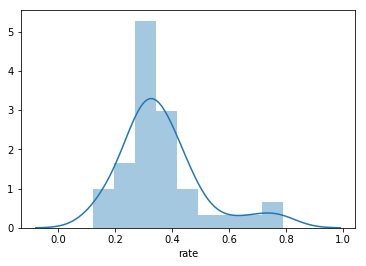

In [248]:
sns.distplot(a.loc[0].rate)

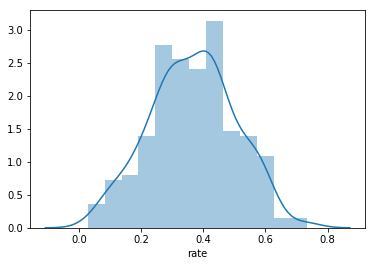

In [249]:
sns.distplot(a.loc[1].rate)

In [214]:
a.loc.apply(lambda v: print(v))

AttributeError: 'Series' object has no attribute 'IsPr'

In [213]:
av = 9471                          
np.sum(train[train.AVProductStatesIdentifier == av].HasDetections) / len(train[train.AVProductStatesIdentifier == av].HasDetections)

0.2547691907025197